In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)
import tabula
from pandasql import sqldf
import math
from scipy.stats import chi2
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# dna_path = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyBase_results\DNA_inside_GOenrich.txt", delimiter = '\t', header = 1)
# rna_path = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyBase_results\RNA_inside_GOenrich.txt", delimiter = '\t', header = 1)

In [4]:
DNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'weighted')
RNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'weighted')

##### selected: Flag of genes selected in the filter panel
##### Node_status: genes who is clustered and unclustered

## DNA inside

#### --- 8 genes inner circle ---

criteria: 20 <= degree <= 50

In [4]:
# dna_network8 = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside8\DNA_inside_network8_node.csv")
# dna_network8['name'] = dna_network8['name'].apply(lambda x : x.lower().capitalize())

In [5]:
# dna_networkedge8 = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside8\DNA_inside_network8_edge.csv")

In [6]:
# dna_network8[dna_network8['selected'] == True]

In [7]:
# cri1 = dna_network8['degree.layout'] >= 20
# cri2 = dna_network8['degree.layout'] <= 50
# df = dna_network8[cri1 & cri2].reset_index().drop(['index'], axis = 1)
# print('inner circle:', len(df))
# print(len(set(DNA_inside_w.iloc[:135]['gene']) & set(df['name'])))

In [8]:
# # 其中一個基因是 Mips2 即 Glyma.18g018600
# dna_network8.loc[(dna_network8['name'] == 'Mips2'), 'name'] = 'Glyma.18g018600'

#### --- 24 genes inner circle ---

criteria: 20 <= degree <= 55

In [9]:
dna_network = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\DNA_inside_network24_node.csv")
dna_network['gene'] = dna_network['name'].apply(lambda x : x.lower().capitalize())

In [10]:
U = 57
L = 25
cri1 = dna_network['degree.layout'] >= L
cri2 = dna_network['degree.layout'] <= U
df = dna_network[cri1 & cri2].reset_index().drop(['index'], axis = 1)
print('inner circle:', len(df))
print('DTgenes involved with network', len(set(DNA_inside_w.iloc[:135]['gene']) & set(df['gene'])))

inner circle: 32
DTgenes involved with network 16


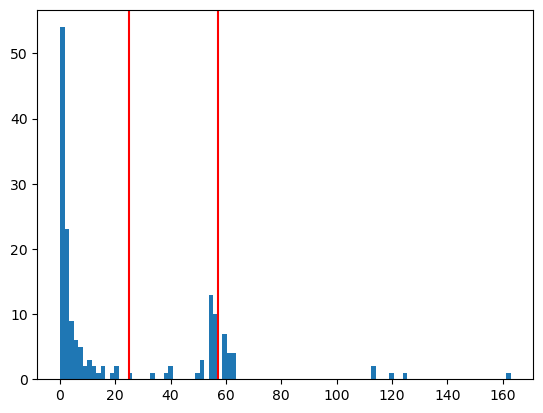

In [11]:
plt.hist(dna_network['degree.layout'], bins = 100)
plt.axvline(x = L, color = 'red')
plt.axvline(x = U, color = 'red')
plt.show()

In [12]:
dna_network_dt = list(set(DNA_inside_w.iloc[:135]['gene']) & set(df['gene']))
len(dna_network_dt)

16

--- pathway Hypergeometric test ---

In [3]:
GO = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\Function\GO_terms_4899.txt", header = 0, sep = '\t')
data = DNA_inside_w.iloc[:135].copy()

# GO pathways selection (criteria no.pathways > 4 AND < 1500)
GO_v1 = GO[(GO['N.genes'] >= 4) & (GO['N.genes'] < 1500)].reset_index().drop(['index'], axis = 1)

C:\Users\edwar\AppData\Local\Temp\ipykernel_2480\1768947725.py:1: DtypeWarning: Columns (58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,2

In [6]:
print('Number of filtered pathways:{}'.format(len(GO_v1)))

Number of filtered pathways:3194


In [14]:
# finding at least one genes in GO Pathway
pathways = []
for i in range(len(GO_v1['Pathway'])):
    pathway_genes = GO_v1[GO_v1['Pathway'] == GO_v1['Pathway'][i]].iloc[:, 3:3 + GO_v1['N.genes'][i]].iloc[0].values
    if len(data[data['gene'].isin(pathway_genes)]) > 0:
        pathways.append(GO_v1['Pathway'][i])
    
    if (i + 1) / 50 == 0:
        print(i + 1)

In [15]:
GO_v2 = GO_v1[GO_v1['Pathway'].isin(pathways)].reset_index().drop(['index'], axis = 1)

In [16]:
gene_list_pw = []
for i in range(len(GO_v2['Pathway'])):
    genes = GO_v2[GO_v2['Pathway'] == GO_v2['Pathway'][i]].iloc[:, 3:3 + GO_v2['N.genes'][i]].iloc[0].values
    gene_list_pw = list(gene_list_pw) + list(genes)
    gene_list_pw = set(gene_list_pw)
    
    if (i + 1) % 50 == 0:
        print(i + 1)
ttl_genes_pw = len(gene_list_pw)
print('total unique genes involved in pathways which have at least one DTgenes:', ttl_genes_pw)

50
100
150
200
250
300
350
400
total unique genes involved in pathways which have at least one DTgenes: 31383


In [17]:
gene_list_dt = []
for i in range(len(GO_v2['Pathway'])):
    genes = GO_v2[GO_v2['Pathway'] == GO_v2['Pathway'][i]].iloc[:, 3:3 + GO_v2['N.genes'][i]].iloc[0].values
    dt_gene = data[data['gene'].isin(genes)].reset_index().drop(['index'], axis = 1)['gene']
    gene_list_dt = list(gene_list_dt) + list(dt_gene)
    gene_list_dt = set(gene_list_dt)
    
    if (i + 1) % 50 == 0:
        print(i + 1)

ttl_genes_dt = len(gene_list_dt)
print('total DTgenes in pathways which have at least one DTgenes: ', ttl_genes_dt)

50
100
150
200
250
300
350
400
total DTgenes in pathways which have at least one DTgenes:  135


In [18]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
# from statsmodels import stats
p = []

for i in range(len(GO_v2['Pathway'])):
    ttl_genes_inpw = GO_v2.iloc[i]['N.genes']
    # npa 為存在在該 pw的 DT genes
    npa = pd.DataFrame(GO_v2.iloc[i].iloc[3:3 + GO_v2.iloc[i]['N.genes']]).reset_index().drop(['index'], axis = 1)
    npa.columns = ['gene']
    ttl_genes_dtin = len(npa[npa['gene'].isin(gene_list_dt)])
    
    # ttl_genes_dtin: No.DTgenes involved with genes in targeted pathway
    # ttl_genes_pw: total unique genes in all targeted pathways which include at least one DTgenes
    # ttl_genes_inpw: total genes in targeted pathway
    # ttl_genes_dt: No.DTgenes
    
    x, L, S, M = ttl_genes_dtin, ttl_genes_pw, ttl_genes_inpw, ttl_genes_dt
    p_val = hypergeom.sf(x - 1, L, S, M)
    p.append(p_val)
    p_BH = multipletests(p, alpha = 0.05, method = 'fdr_bh')[1]
    p_Bonf = multipletests(p, alpha = 0.05, method = 'bonferroni')[1]
    
    if (i + 1) % 50 == 0:
        print(i + 1)

50
100
150
200
250
300
350
400


In [19]:
GO_v3 = GO_v2[['GO_id', 'Pathway', 'N.genes']]
GO_v3['p'] = p
GO_v3['p_BH'] = p_BH
GO_v3['p_Bonf'] = p_Bonf

C:\Users\edwar\AppData\Local\Temp\ipykernel_15948\1294302797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_v3['p'] = p
C:\Users\edwar\AppData\Local\Temp\ipykernel_15948\1294302797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_v3['p_BH'] = p_BH
C:\Users\edwar\AppData\Local\Temp\ipykernel_15948\1294302797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [20]:
# GO_v3.to_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\DNA_hypergeom_results.xlsx",index = False)

In [21]:
# set 10 ** -6 as raw p threshold
print('No.Go pathways whose p < p-value threshold: ', len(GO_v3[GO_v3['p'] < 10 ** -5]))

No.Go pathways whose p < p-value threshold:  21


In [22]:
pw_select = list(GO_v3[GO_v3['p'] < 10 ** -5].reset_index().drop(['index'], axis = 1)['Pathway'])
len(pw_select)

21

In [23]:
# calculate how much DTgenes is in these 21 pathways
GO_v4 = GO_v2[GO_v2['Pathway'].isin(pw_select)].reset_index().drop(['index'], axis = 1)
gene_list_dt2 = []

for i in range(len(GO_v4['Pathway'])):
    genes = GO_v4[GO_v4['Pathway'] == GO_v4['Pathway'][i]].iloc[:, 3:3 + GO_v4['N.genes'][i]].iloc[0].values
    dt_gene = data[data['gene'].isin(genes)].reset_index().drop(['index'], axis = 1)['gene']
    gene_list_dt2 = list(gene_list_dt2) + list(dt_gene)
    gene_list_dt2 = set(gene_list_dt2)
    
    if (i + 1) % 2 == 0:
        print(i + 1)
print('{} genes involved with {} pathways'.format(len(gene_list_dt2), len(pw_select)))

2
4
6
8
10
12
14
16
18
20
112 genes involved with 21 pathways


In [24]:
# data[data['gene'].isin(gene_list_dt2)].reset_index().rename(columns = {'index':'org_rank'}).to_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\DNA_gene_lists.xlsx', index = False)

pw genes (results from 112 genes analyzed in cytoscape)

In [25]:
dna_pw_network = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\DNA_inside_PWnetwork_node.csv")
dna_pw_network['gene'] = dna_pw_network['name'].apply(lambda x : x.lower().capitalize())

In [26]:
L = 26
U = 52
cri1 = dna_pw_network['degree.layout'] >= L
cri2 = dna_pw_network['degree.layout'] <= U
inner_circle = len(dna_pw_network[cri1 & cri2])
# df_pw = dna_pw_network[cri1 & cri2].reset_index()
print('inner circle {}'.format(inner_circle))
print('No.DTgenes gained by significant pw:', len(set(dna_pw_network[cri1 & cri2].reset_index().drop(['index'], axis = 1)['gene']) & set(data['gene'])))

inner circle 33
No.DTgenes gained by significant pw: 16


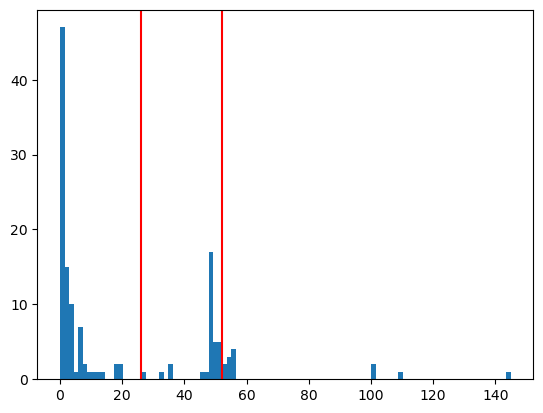

In [27]:
plt.hist(dna_pw_network['degree.layout'], bins = 100)
plt.axvline(x = L, color = 'red')
plt.axvline(x = U, color = 'red')
plt.show()

In [28]:
# DTgenes gained by significant pw
dna_network_pwdt = list(set(dna_pw_network[cri1 & cri2].reset_index().drop(['index'], axis = 1)['gene']) & set(data['gene']))

In [29]:
# Union of DTgenes gained by significant pw and DTgenes involved with network
Union_DNA = list(set(dna_network_dt) | set(dna_network_pwdt))
print('Union DNA: {}'.format(len(Union_DNA)))

Union DNA: 17


In [30]:
overlap_DNA = list(set(dna_network_dt) & set(dna_network_pwdt))
print('Overlapped DNA: {}'.format(len(overlap_DNA)))

Overlapped DNA: 15


###### Summary

In [31]:
summary = pd.DataFrame()
summary['Union_DNA'] = Union_DNA
summary['DNA_dt_network'] = dna_network_dt + [np.nan for i in range(len(Union_DNA) - len(dna_network_dt))]
summary['DNA_dt_network_pw'] = dna_network_pwdt + [np.nan for i in range(len(Union_DNA) - len(dna_network_pwdt))]
summary['intersection_DNA'] = list(set(dna_network_dt) & set(dna_network_pwdt)) + [np.nan for i in range(len(Union_DNA) - len(list(set(dna_network_dt) & set(dna_network_pwdt))))]

In [32]:
all_pathways = pd.DataFrame()
all_pathways['pw_selected'] = pw_select

In [33]:
writer = pd.ExcelWriter(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\DNA_NarrowDown_summary.xlsx')
summary.to_excel(writer, sheet_name = 'gene_information', index = False)
all_pathways.to_excel(writer, sheet_name = 'selected_pw', index = False)
writer.close()

In [34]:
# dna_gene_list = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\DNA_gene_lists.xlsx')
# rna_gene_list = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\RNA_gene_lists.xlsx')
# len(set(dna_gene_list['gene']) & set(rna_gene_list['gene']))